In [1]:
# IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.preprocessing import power_transform
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [2]:
# LOADING THE DATASET
df=pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Here we have loaded the required dataset using pandas dataframe.

In [3]:
df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


It gives us the first five index values from the dataset.

In [4]:
df.shape

(200, 5)

we have 200 rows and 5 columns including tha target

In [5]:
#statistical summary
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


This column shows the statistical values for the data like mean,standard deviation and percentiles,minimum and maximum.

In [6]:
#checking for null values or missing data
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There are no null or missing values in the above dataset.

We can also see this by a visualization method by using seaborn library.

<AxesSubplot:>

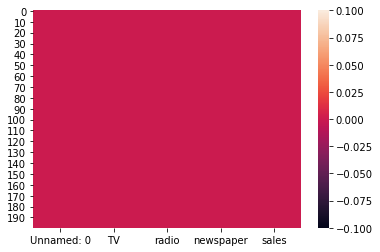

In [7]:
sns.heatmap(df.isnull())

In [8]:
#checking for datatypes
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [9]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

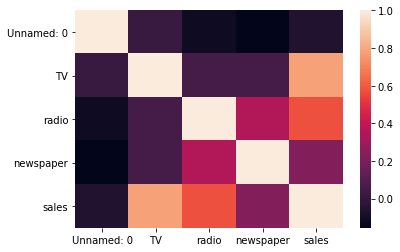

In [10]:
sns.heatmap(df.corr())

<AxesSubplot:>

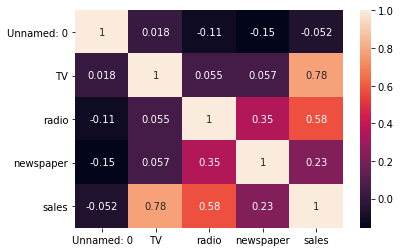

In [11]:
sns.heatmap(df.corr(),annot=True)

So from the above plot we can see that Sales and TV are highly correalted a whereas TV and radio are negatively correlated. and there is no multicolinearity exist insdie the dataset.

<AxesSubplot:xlabel='TV'>

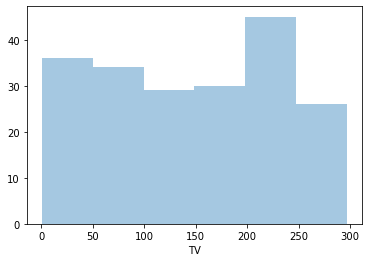

In [12]:
sns.distplot(df['TV'],kde=False)

As we can observe that the above plot is not a normal distribution plot means the data is not nomrmally distributed. there exists some skewness.

<AxesSubplot:xlabel='radio', ylabel='Density'>

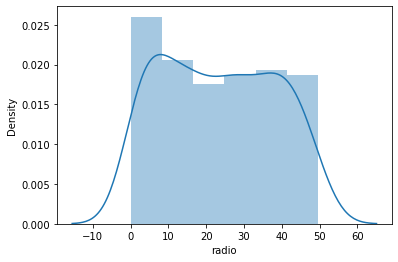

In [13]:
sns.distplot(df['radio'])

This is also not a normally distributed data there is some skeweness present inside the data.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

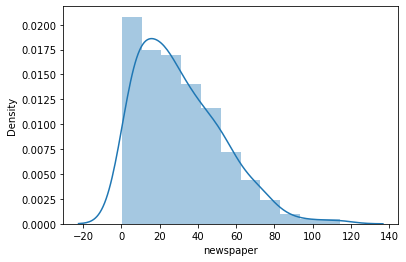

In [14]:
sns.distplot(df['newspaper'])

It is observed that data is not normally distributed and it has skewness inside so we have to remove the skewness of the data.

<AxesSubplot:xlabel='sales', ylabel='Density'>

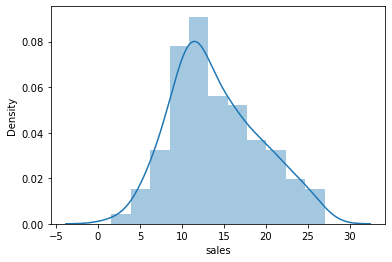

In [15]:
sns.distplot(df['sales'])

So from the above plot we can conclude that the datas is normally distributed and no skewness is present inside it.

<AxesSubplot:xlabel='sales', ylabel='TV'>

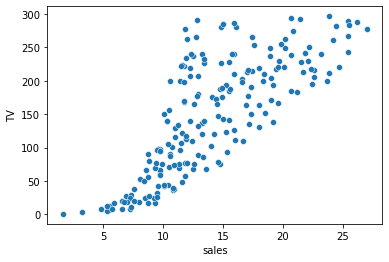

In [115]:
sns.scatterplot(x='sales',y='TV',data=df)

from the above plot we can observe that sales and TV are proportional to each other as the TV increases sales also increases. so we can also say they are positvely corealted.

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

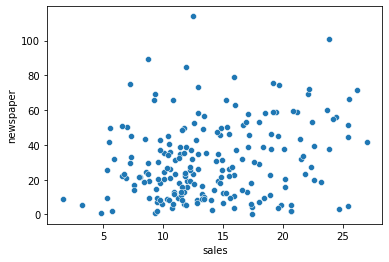

In [116]:
sns.scatterplot(x='sales',y='newspaper',data=df)

so from above graph, we can say that sales generated from newspaper is dense in the range between 9-20. ans some outliers are there in the newspaper column.

<AxesSubplot:xlabel='sales', ylabel='radio'>

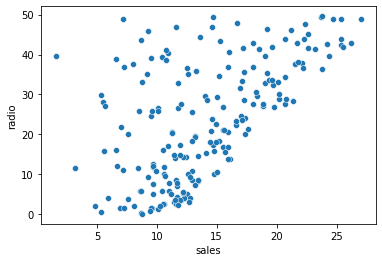

In [117]:
sns.scatterplot(x='sales',y='radio',data=df)

from the above plot we can observe that sales and radio are also proportional to each other as the radio value increases sales value also increases. so we can also say they are positvely correalted.

<AxesSubplot:xlabel='sales', ylabel='TV'>

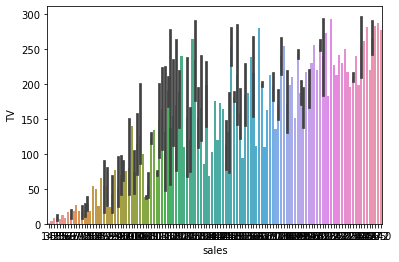

In [110]:
sns.barplot(x='sales',y='TV',data=df)

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

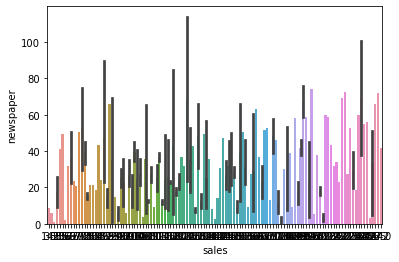

In [111]:
sns.barplot(x='sales',y='newspaper',data=df)

<AxesSubplot:xlabel='sales', ylabel='radio'>

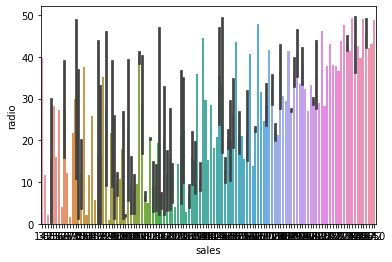

In [112]:
sns.barplot(x='sales',y='radio',data=df)

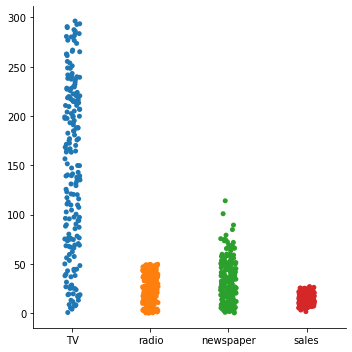

In [121]:
sns.catplot(data=df,)

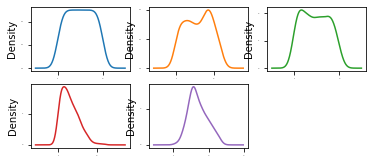

In [16]:
df.plot(kind='density',subplots=True,sharex=False,layout=(3,3),legend=False,fontsize=1)
plt.show()

So from this plot we can see the data in one window and it shows that Data are not normally distributed. so skewness is present in the dataset.

In [17]:
df.drop('Unnamed: 0',axis=1,inplace=True)

We have dropped the column['Unnamed:0'] as it is not contributing much to our target variable.

In [18]:
#Splitting the independent variables and target
x=df.iloc[:,0:-1]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [20]:
x.skew().sort_values(ascending=False)

newspaper    0.894720
radio        0.094175
TV          -0.069853
dtype: float64

In [21]:
x_new=power_transform(x)
type(x_new)

numpy.ndarray

In [22]:
x=pd.DataFrame(x_new,columns=x.columns)
x

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


In [23]:
x.skew().sort_values(ascending=False)

newspaper   -0.077942
radio       -0.242968
TV          -0.315199
dtype: float64

In [24]:
sk=x.skew()
sk

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

In [25]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x125a099a0>,
 'caps': [<matplotlib.lines.Line2D at 0x125a140a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x125a09640>],
 'medians': [<matplotlib.lines.Line2D at 0x125a14760>],
 'fliers': [<matplotlib.lines.Line2D at 0x125a14ac0>],
 'means': []}

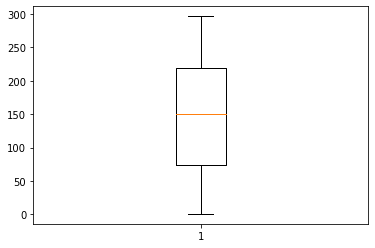

In [26]:
#CHECKING OUTLIERS
plt.boxplot(df['TV'])

So as we can see no outliers are present inside the column 'TV'.

{'whiskers': [<matplotlib.lines.Line2D at 0x125a6b5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x125a6bca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x125a6b280>],
 'medians': [<matplotlib.lines.Line2D at 0x125ad03a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x125ad0700>],
 'means': []}

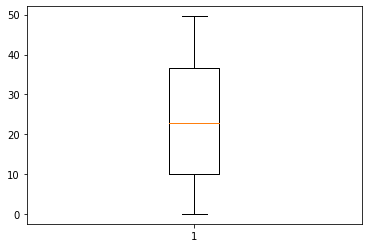

In [27]:
plt.boxplot(df['radio'])

So as we can see no outliers are present inside the column 'TV'.

{'whiskers': [<matplotlib.lines.Line2D at 0x125b8ebe0>,
 'caps': [<matplotlib.lines.Line2D at 0x125b9c2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x125b8e880>],
 'medians': [<matplotlib.lines.Line2D at 0x125b9c9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x125b9cd00>],
 'means': []}

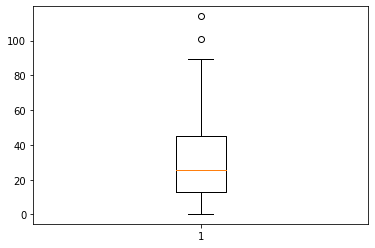

In [28]:
plt.boxplot(df['newspaper'])

As this feature has only one to two outliers presnt so we can ignore it no need to remove outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x125c10220>,
 'caps': [<matplotlib.lines.Line2D at 0x125c108e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x125c01e80>],
 'medians': [<matplotlib.lines.Line2D at 0x125c10fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x125c78340>],
 'means': []}

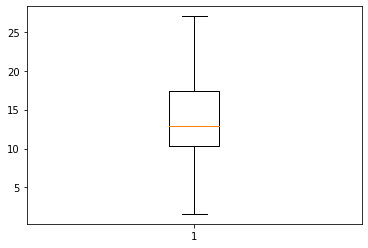

In [29]:
plt.boxplot(df['sales'])

So as we can see no outliers are present inside the column 'sales'.

So from the above all plots we have observed that no outliers are present inside the dataset.

In [30]:
x

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


In [34]:
#LABEL ENCODING
y=df['sales'].apply(lambda y_value:1 if y_value>=20 else 0)
y

0      1
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    0
Name: sales, Length: 200, dtype: int64

So, we have encoded the above sales label/target and above 20 is considered as good sales.

In [35]:
y

0      1
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    0
Name: sales, Length: 200, dtype: int64

So this is the final encoded output or target to work on with testing and training.

In [83]:
#training and testing of model
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=153)

In [84]:
xtrain.shape

(160, 3)

In [85]:
ytrain.shape

(160,)

In [86]:
xtest.shape

(40, 3)

In [87]:
ytest.shape

(40,)

In [88]:
#APPLYING ML ALGORITHMS
#LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
predlg=lg.predict(xtest)
print(accuracy_score(ytest,predlg))
print(classification_report(ytest,predlg))
print(confusion_matrix(ytest,predlg))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[35  0]
 [ 0  5]]


In [89]:
#RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
predrfc=rfc.predict(xtest)
print(accuracy_score(ytest,predrfc))
print(classification_report(ytest,predrfc))
print(confusion_matrix(ytest,predrfc))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[35  0]
 [ 0  5]]


In [90]:
#SUPPORT VECTOR CLASSIFIER
svc=SVC()
svc.fit(xtrain,ytrain)
predsvc=svc.predict(xtest)
print(accuracy_score(ytest,predsvc))
print(classification_report(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[35  0]
 [ 0  5]]


In [91]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)
gnb.score(xtrain,ytrain)
predgnb=gnb.predict(xtest)
print(accuracy_score(ytest,predgnb))
print(confusion_matrix(ytest,predgnb))
print(classification_report(ytest,predgnb))

0.975
[[34  1]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.83      1.00      0.91         5

    accuracy                           0.97        40
   macro avg       0.92      0.99      0.95        40
weighted avg       0.98      0.97      0.98        40



In [92]:
from sklearn.tree import DecisionTreeClassifier
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
dtc.score(xtrain,ytrain)
preddtc=dtc.predict(xtest)
print(accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

0.975
[[34  1]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.83      1.00      0.91         5

    accuracy                           0.97        40
   macro avg       0.92      0.99      0.95        40
weighted avg       0.98      0.97      0.98        40



It is observed that among all the algorithms Logistic Regression and Support vector classifier are giving the best accuracy. So for this case we are consdiering Logostci Regression.

In [93]:
# CROSS VALIDATION
cv0=cross_val_score(lg,x,y,cv=5)
print('cross validation score of logistic regression is',cv0.mean())

cross validation score of logistic regression is 0.975


In [94]:
cv1=cross_val_score(rfc,x,y,cv=5)
print('cross validation score of Random Forest Classifier is',cv1.mean())

cross validation score of Random Forest Classifier is 0.96


In [95]:
cv2=cross_val_score(svc,x,y,cv=5)
print('cross validation score of Support Vector Classfier is',cv2.mean())

cross validation score of Support Vector Classfier is 0.9550000000000001


In [96]:
cv3=cross_val_score(gnb,x,y,cv=5)
print('cross validation score of Gaussian NB is',cv3.mean())

cross validation score of Gaussian NB is 0.95


In [97]:
cv4=cross_val_score(dtc,x,y,cv=5)
print('cross validation score of Decision Tree Classifier is',cv4.mean())

cross validation score of Decision Tree Classifier is 0.9550000000000001


Logistic regression is giving the best cv score among all the algotrithms so we will proceed with the Logistic Regression.

In [98]:
# HYPERPARAMETER TUNING
RandomForestClassifier()
parameters={'max_features':["auto", "sqrt", "log2"],'max_depth':[4,5,6,7,8],'criterion':["gini", "entropy"]}

In [99]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
gcv.fit(xtrain,ytrain)
gcv.best_params_ #printing the best parameters found by GridSearchCV

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}

In [61]:
gcv_pred=gcv.best_estimator_.predict(xtest)
accuracy_score(ytest,gcv_pred)

0.95

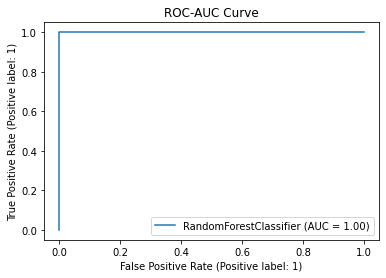

In [100]:
#ROC AUC PLOT
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gcv.best_estimator_,xtest,ytest)
plt.title('ROC-AUC Curve')
plt.show()

In [101]:
#SAVING THE BEST MODEL
import joblib
joblib.dump(gcv.best_estimator_,'Advertising.csv.pk1')

['Advertising.csv.pk1']